在matplotlib.pyplot各种状态下，函数调用之间会保留在一起，以便跟踪当前图形和绘图区域之类的内容，并且绘图功能指向当前轴（请注意，此处和文档中大多数地方的“轴”均指到轴 的图形的部分 和不超过一个轴线的严格的数学术语）

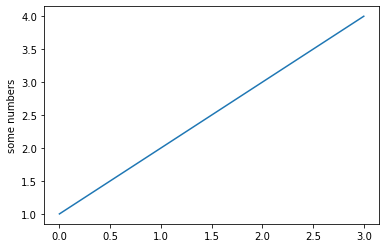

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

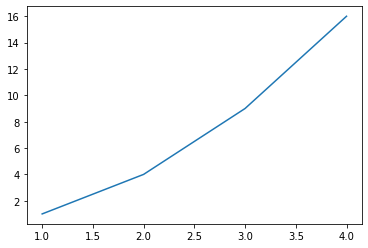

In [3]:
plt.plot([1,2,3,4],[1,4,9,16])

格式化绘图样式

对于每对x，y参数，都有一个可选的第三个参数，它是表示图的颜色和线条类型的格式字符串。格式字符串的字母和符号来自MATLAB，您将颜色字符串与线条样式字符串连接在一起。默认格式字符串是“ b-”，这是一条蓝色实线。例如，要用红色圆圈绘制以上内容，您将发出

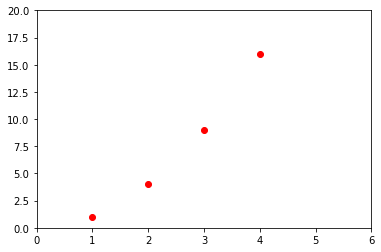

In [4]:
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.axis([0,6,0,20]) #设定了轴的上下界 [xmin, xmax, ymin, ymax]
plt.show()

如果matplotlib仅限于使用列表，则对于数字处理将毫无用处。通常，您将使用numpy数组。实际上，所有序列都在内部转换为numpy数组。下面的示例说明了使用数组在一条命令中绘制几行具有不同格式样式的行。

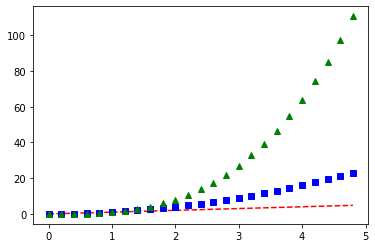

In [5]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

用关键字字符串绘图

在某些情况下，您拥有某种格式的数据，该格式允许您使用字符串访问特定变量。例如，使用 numpy.recarray或pandas.DataFrame。

Matplotlib允许您为此类对象提供data关键字参数。如果提供的话，您可以使用与这些变量相对应的字符串生成图。

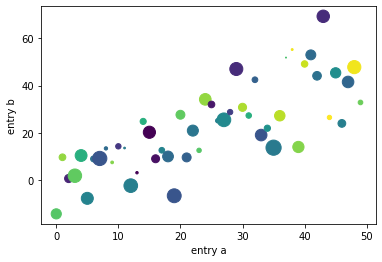

In [6]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

用分类变量绘图

也可以使用分类变量创建图。Matplotlib允许您将类别变量直接传递给许多绘图函数。例如

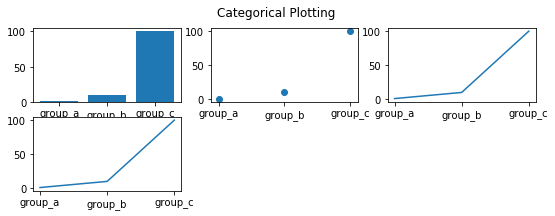

In [12]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(2,3,1) #这三个是2行3列的图表的第一个
plt.bar(names, values)
plt.subplot(2,3,2)
plt.scatter(names, values)
plt.subplot(2,3,3)
plt.plot(names, values)
plt.subplot(2,3,4)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

控制线特性

线条具有许多可以设置的属性：线宽，破折号样式，抗锯齿等；见matplotlib.lines.Line2D。有几种设置线属性的方法

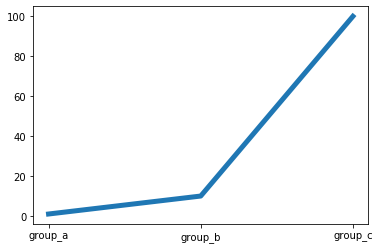

In [16]:
plt.plot(names, values,linewidth = 5.0)

使用Line2D实例的setter方法。plot返回Line2D对象列表；例如。在下面的代码中，我们假设只有一行，所以返回的列表的长度为1。我们使用tuple unpacking 来获取该列表的第一个元素：line1, line2 = plot(x1, y1, x2, y2)line

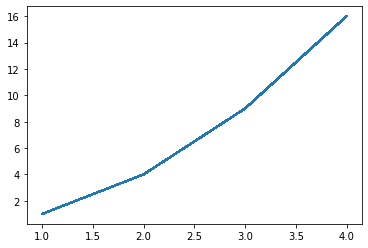

In [18]:
x = [1,2,3,4]
y = [1,4,9,16]
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialiasing

[None, None]

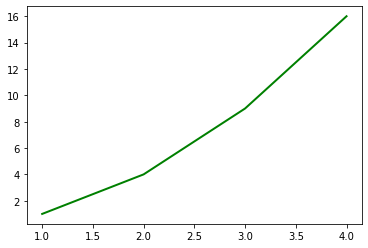

In [22]:
lines = plt.plot(x, y)
# use keyword args
plt.setp(lines, color='b', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'green', 'linewidth', 2.0)

MATLAB和和pyplot具有当前图形和当前轴的概念。所有绘图命令均适用于当前轴。该函数gca()返回当前轴（一个matplotlib.axes.Axes实例），并 gcf()返回当前图形（一个matplotlib.figure.Figure实例）。通常，您不必为此担心，因为所有这些操作都是在后台进行的。下面是创建两个子图的脚本。

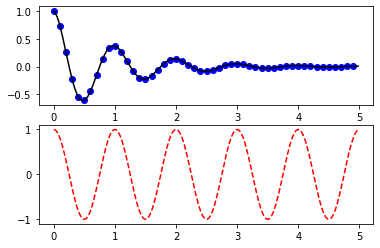

In [23]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

您可以创建任意数量的子图和轴。如果要手动放置轴（即不在矩形网格上），请使用axes()命令，该命令允许您将位置指定为所有值均位于小数（0至1）坐标中。有关手动放置轴的示例，请参见“ 轴演示”；有关具有大量子图的示例，请参见“ 基本子图”演示。axes([left, bottom, width, height])

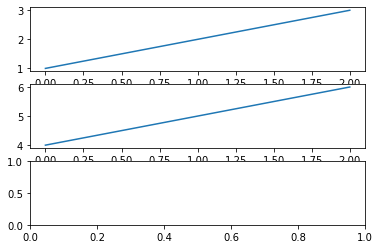

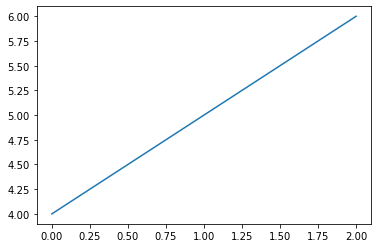

In [30]:
#创建多个子图
plt.figure(1)                # the first figure
plt.subplot(311)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(312)             # the second subplot in the first figure
plt.plot([4, 5, 6])
plt.subplot(313)
plt.plot([2,3,4])
plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(313)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.cla() #可以通过clf() 和cla()来删除最近的figure


使用文本

text()命令可用于在任意位置添加文本,另外xlabel()， ylabel()和title() 可用于在指示的位置添加文本（ 有关更多详细示例，请参见Matplotlib图中的Text）

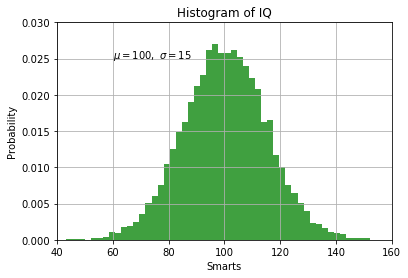

In [31]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

在文本中使用数学表达式
matplotlib在任何文本表达式中接受TeX方程表达式。例如写表达式σi=15 在标题中，您可以编写一个带有美元符号的TeX表达式

https://matplotlib.org/tutorials/text/mathtext.html 这是表达式的文档

对于安装了LaTeX和dvipng的用户，您还可以使用LaTeX设置文本格式并将输出直接合并到显示图形或保存的后记中-请参阅  https://matplotlib.org/tutorials/text/usetex.html

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\sigma_i=15$')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.title(r'$\sigma_i=15$') #字符串前面的r很重要表示是一个raw字符串 防止字符转义的
plt.grid(True)
plt.show()

注释文字

text()上面基本命令的使用将文本放置在轴上的任意位置。文本的常见用法是注释绘图的某些功能，并且该 annotate()方法提供了帮助程序功能以简化注释。在注释中，有两点需要考虑：由参数表示的要注释xy的位置和text的位置xytext
这两个参数都是元组。(x, y)

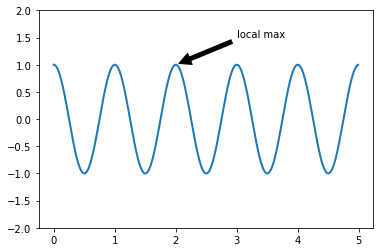

In [32]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

对数轴和其他非线性轴¶
matplotlib.pyplot不仅支持线性轴刻度，还支持对数和对数刻度。如果数据跨多个数量级，则通常使用此方法。更改轴的比例很容易

In [ ]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()